3.- Multi Armed Bandit (MAB)
El problema del "Bandido Multi-Brazo" es un problema clásico del aprendizaje por refuerzo basado en el juego de las máquinas "tragaperras" donde se "tira del brazo" (palanca) de la "tragaperras" y se obtiene una recompensa por el juego, positiva si se gana dinero o negativa si perdemos el dinero.

A este problema se le conoce como el problema del "Bandido Multi-Brazo" al denominarse una máquina "tragaperras" como "Bandido de un solo brazo". Cuando se juega a varias máquinas "tragaperras" se denomina "Bandido de Multiples Brazos", de ahí el nombre de "Multi Armed Bandit" (MAB):

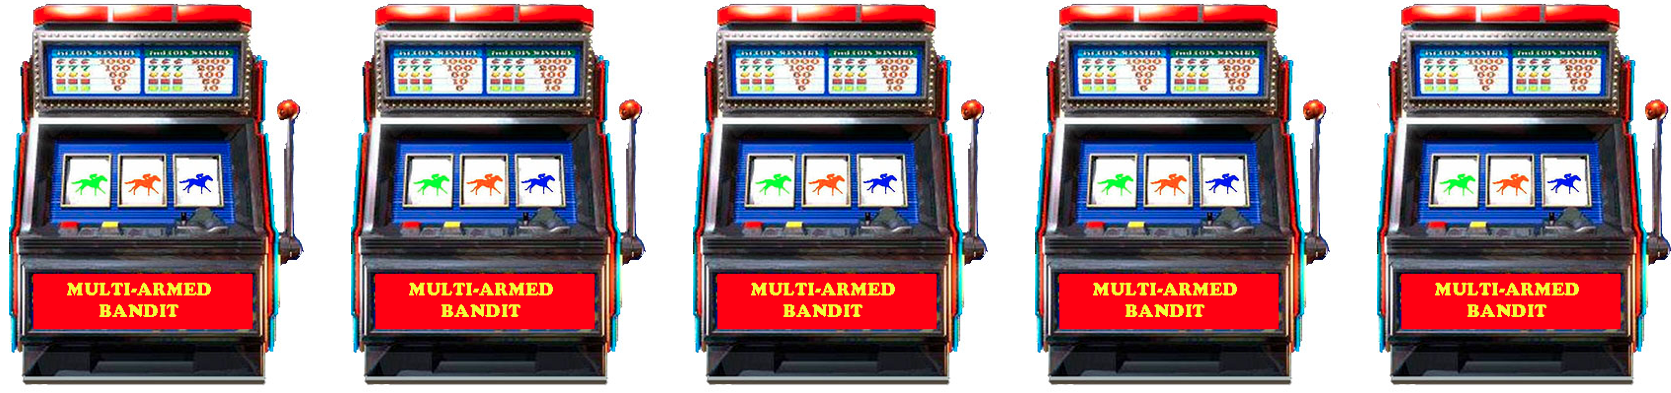

El objetivo de este problema es el de jugar un 'P' partidas a las 'K' "tragaperras" y obtener el mayor beneficio posible (la mayor recompensa posible).

Para ello tendremos que ir jugando partidas en las 'K' "tragaperras" y descubrir cual es la distribución de probabilidad de obtener premio en cada una de las "tragaperras". Con esto conseguiremos saber a que máquinas jugar y en que orden para máximizar nuestros beneficios (o recompensas).

Para resolver este problema definimos el Q(a) como la recompensa media (beneficios medios) recibida por partida en la "tragaperras"  y se calcula como:
 Q(A) = Ra/Na

Siendo:

Ra: Suma de las recompensas (beneficiós) obtenidos en la "tragaperras".
Na: Número total de partidas jugadas en la "tragaperras".
El objetivo es encontrar la máquina "tragaperras" que mayor beneficio (recompensa) dé:
Q(a*) = maxQ(a)

Siendo:

a*: El conjunto de las 'K' "tragaperras" a las que se juega.

En este problema es muy importante aplicar correctamente los conceptos de "Explotación" y "Exploración" ya que si solo nos dedicamos a "Explorar" obtendremos el valor medio de recompensas que dén las 'K' "tragaperras" y si solo nos dedicamos a "Explotar" obtendremos la recompensa que nos dé la primera "tragaperras" a la que jugemos.

Para ello debemos de seguir una política conocida como "epsilon-greedy policy" la cual seleccionará una "tragaperras" al azar con probabilidad para jugar y explorar o seleccionará la mejor "tragaperras" con probabilidad.
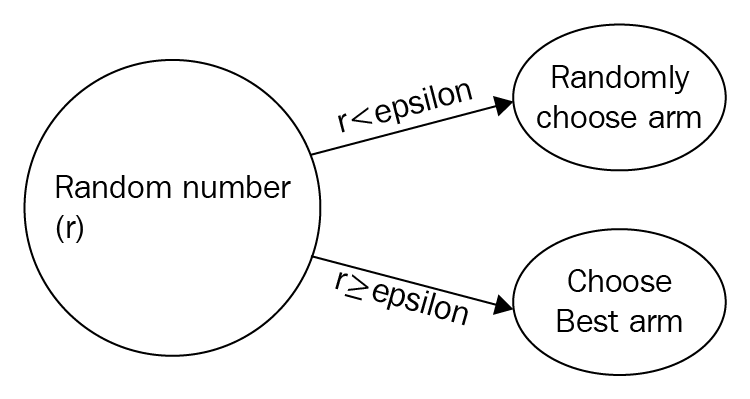

In [6]:
# https://github.com/RicardoMoya/Reinforcemente_Learning_with_Python/blob/master/3_Multi-Armed_Bandit.ipynb

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

In [7]:
import random
import numpy as np


def gen_bandits():
    # Función que devuelve una lista de probabilidades ordenadas al azar
    # Las probabilidades son números entre 0 y 1
    bandits = [0.1, 0.1, 0.1, 0.2, 0.6]
    random.shuffle(bandits)
    return bandits


def multi_armed_bandit(num_games=1000, epsilon=0.1, verbose=False):

    bandits = gen_bandits()
    total_reward = 0
    acum_reward_bandit = np.zeros(len(bandits))  # numerador
    num_selected_bandit = np.zeros(len(bandits)) # denominador
    q_bandits = np.zeros(len(bandits))            # Q(a)

    if verbose:
        print("Initial Bandits Distribution\n  {}".format(bandits))

    for game in range(0,num_games):

        # Hago una copia de los Q(a)
        old_q_bandits = q_bandits.copy()

        # Selecciono "tragaperras" a la que jugar
        if np.random.random() < epsilon:
            bandit = np.random.randint(len(bandits)) # Exploro
        else:
            bandit = np.random.choice(np.flatnonzero(q_bandits == q_bandits.max())) # Exploto

        # Obtengo el reward
        reward = 1 if (np.random.random() < bandits[bandit]) else 0

        # Actualizo reward total
        total_reward += reward

        # Actualizo valor (Q) de la "tragaperras"
        acum_reward_bandit[bandit] += reward
        num_selected_bandit[bandit] += 1
        q_bandits[bandit] = acum_reward_bandit[bandit] / num_selected_bandit[bandit]

        if verbose:
            print("\nGAME {game}\n  Old Q_Bandits = {old_q_bandits}\n  Selected Bandit = {bandit} \
                  \n  Reward = {reward}\n  Q_Bandits = {q_bandits}"
                  .format(game=game+1, old_q_bandits=old_q_bandits, bandit=bandit,
                          reward=reward, q_bandits=q_bandits))

    return bandits, total_reward, q_bandits, num_selected_bandit

Initial Bandits Distribution
  [0.1, 0.6, 0.1, 0.2, 0.1]
Bandits Distribution games
  [ 24. 920.  16.  25.  15.]
Q(a) Bandits
  [0.1667 0.612  0.     0.16   0.    ]
Reward: 571


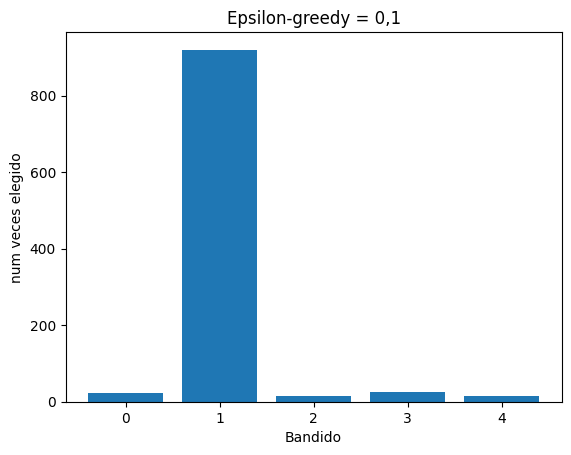

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
np.set_printoptions(precision=4)

bandits, total_reward, q_bandits, num_selected_bandit = multi_armed_bandit(num_games=1000,
                                                                           epsilon=0.1,
                                                                           verbose=False)

print("Initial Bandits Distribution\n  {}".format(bandits))
print("Bandits Distribution games\n  {}".format(num_selected_bandit))
print("Q(a) Bandits\n  {}".format(q_bandits))
print("Reward: {}".format(total_reward))

# Mostramos en una gráfica de barras el número de veces que elegimos cada "tragaperras"
plt.title('Epsilon-greedy = 0,1')
plt.bar(range(0,len(bandits)), num_selected_bandit)
plt.xlabel('Bandido')
plt.ylabel('num veces elegido')
plt.show()


Initial Bandits Distribution
  [0.6, 0.2, 0.1, 0.1, 0.1]
Bandits Distribution games
  [232. 202. 187. 194. 185.]
Q(a) Bandits
  [0.6379 0.1931 0.0802 0.0825 0.1243]
Reward: 241


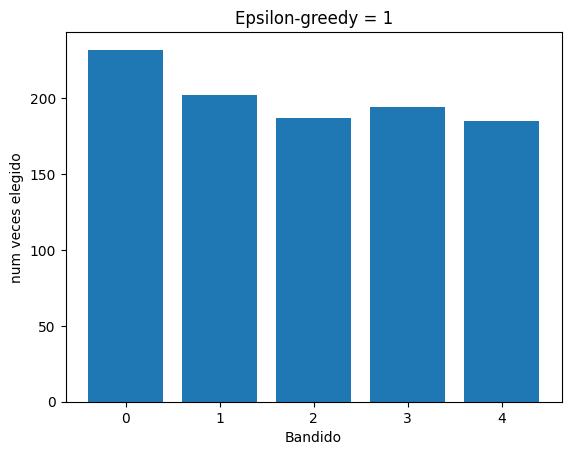

In [9]:
bandits, total_reward, q_bandits, num_selected_bandit = multi_armed_bandit(num_games=1000,
                                                                           epsilon=1.0,
                                                                           verbose=False)

print("Initial Bandits Distribution\n  {}".format(bandits))
print("Bandits Distribution games\n  {}".format(num_selected_bandit))
print("Q(a) Bandits\n  {}".format(q_bandits))
print("Reward: {}".format(total_reward))

# Mostramos en una gráfica de barras el número de veces que elegimos cada "tragaperras"
plt.title('Epsilon-greedy = 1')
plt.bar(range(0,len(bandits)), num_selected_bandit)
plt.xlabel('Bandido')
plt.ylabel('num veces elegido')
plt.show()

Initial Bandits Distribution
  [0.1, 0.6, 0.2, 0.1, 0.1]
Bandits Distribution games
  [   0. 1000.    0.    0.    0.]
Q(a) Bandits
  [0.    0.633 0.    0.    0.   ]
Reward: 633


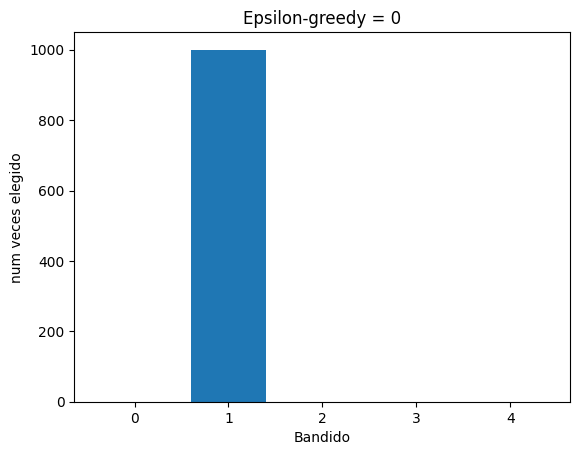

In [10]:
bandits, total_reward, q_bandits, num_selected_bandit = multi_armed_bandit(num_games=1000,
                                                                           epsilon=0.0,
                                                                           verbose=False)

print("Initial Bandits Distribution\n  {}".format(bandits))
print("Bandits Distribution games\n  {}".format(num_selected_bandit))
print("Q(a) Bandits\n  {}".format(q_bandits))
print("Reward: {}".format(total_reward))

# Mostramos en una gráfica de barras el número de veces que elegimos cada "tragaperras"
plt.title('Epsilon-greedy = 0')
plt.bar(range(0,len(bandits)), num_selected_bandit)
plt.xlabel('Bandido')
plt.ylabel('num veces elegido')
plt.show()

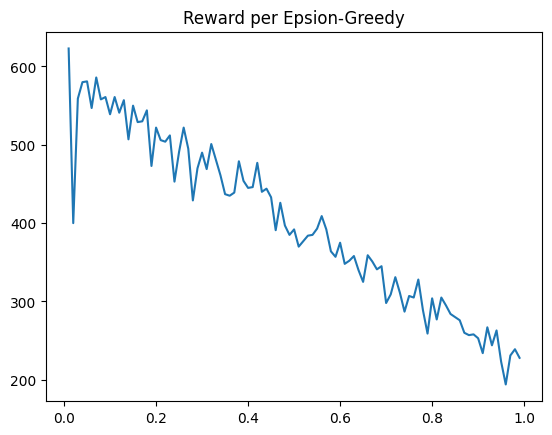

In [11]:
epsilons = np.arange(0.01, 1, 0.01).tolist()
rewards = list()
for epsilon in epsilons:
    bandits, total_reward, q_bandits, num_selected_bandit = multi_armed_bandit(num_games=1000,
                                                                               epsilon=epsilon)
    rewards.append(total_reward)

plt.title('Reward per Epsion-Greedy')
plt.plot(epsilons, rewards)
plt.show()
